# Data Mining and Big Data Analytics 
### Instructor: Márton Karsai, Associate Professor

## Assignment 1

This is the first graded assignment of the course. You have to elaborate on the problems described below and provide code and explanations of your findings. The assignment should be completed entirely in this Jupyter Notebook filling in the appropriate sections. You could add blocks (code and markdown) to accomodate your solutions, however, try to maintain the current structure and order. 

Before submitting your solution, rename the file adding your full name at the beginning. For example, this would be my submission: 

**karsai_marton_assignment1_2022.ipynb**

Please, this is an individual test, don't copy. You may work with friends to help guide problem solving or consult
stack overflow (or similar) to work out a solution, but copying — from friends, previous students, or the Internet — is prohibited (and mostly not useful at all!). NEVER copy blindly blocks of code – it's really easy to tell. If caught cheating, I'm afraid you will fail this course. I'm pretty sure this is not gonna happen, for every issue, suggestion, doubt, the easiest solution is always to come to talk with the instructor or the TA.   


## Problems:

You will find the file **wine.csv** in the assignment folder. This datasets contains the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis quantified 13 different properties of the three types of wines. 

    The features represent the following properties:

    1. Alcohol content
    2. Malic acid content
    3. Ash content
    4. Alcalinity of ash 
    5. Magnesium content
    6. Total phenol content 
    7. Flavanoid content 
    8. Nonflavanoid phenol content 
    9. Proanthocyanin content 
    10. Color intensity 
    11. Hue 
    12. OD280/OD315 absorbance of diluted wines 
    13. Proline concentration 

    The first column (target variable) contains the information about the three different cultivars marked by 1, 2, and 3. 

1. Explore the data: use the approaches presented during the class to discuss the distribution of the typical parameters in each class. Which are more and less diverse? Rank the features based on their relative variance (variance divided by the mean of the set) of their distribution. Study the correlations between features. Which two are the most correlated? The goal of this part is to explore the features space to identify potential issues and instruct the pre-processing phase, e.g., normalization, missing values, feature engeneering (we'll explore these concepts better in the next classes).

2. Build a DecisionTreeClassifier with arbitrary depth, split the data into training and test sets, and measure the accuracy of the model on both (note: one measurement is no measurement, so make sure you repeat the randomization multiple times). Use alternative metrics that give you a better idea of the model performance. Try different ratios regarding the size of the training and the test sets and see how the accuriacies change. How does this change varies for different depth values? Can you observe the occurrance of under/overfitting? Is that consistent with your theoretical expectations? 

3. Solve the wine classification problem with 3-NN and evaluate it with 5-fold cross-validation. 

4. Output the accuracy of a k-NN classifier with the best value of the hyperparameter k. Comment your solution and the performance beyond accuracy. 

5. Which model would you pick (DecisionTree or k-NN) to solve the problem in a business context?     

# Solution 1

In [1]:
import pandas as pd 

wine_df = pd.read_csv("wine.csv")
wine_df.shape

(178, 14)

In [2]:
wine_df.head()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_df.iloc[:, 0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

Prepare the data
    
* y: labels
* X: features space 

In [4]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values

In [5]:
df = wine_df.iloc[:, 1:]

In [6]:
wine_df.shape

(178, 14)

In [7]:
df.shape

(178, 13)

In [8]:
y = y = y.astype('str')


In [9]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
y_count = dict(zip(unique, counts))
y_count

{'1': 59, '2': 71, '3': 48}

In [10]:
y_values=[1,2,3]

In [11]:
y_values

[1, 2, 3]

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

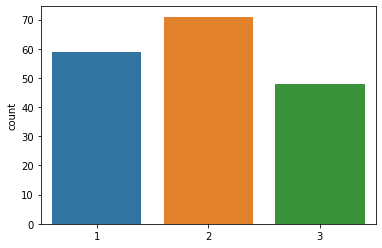

In [12]:
import seaborn as sns
sns.countplot(y)

There is disbalance in the amount of wine types, we should stratify when we do the train_test_split.

In [13]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [14]:
features_names = df.columns.values
features_names

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '], dtype=object)

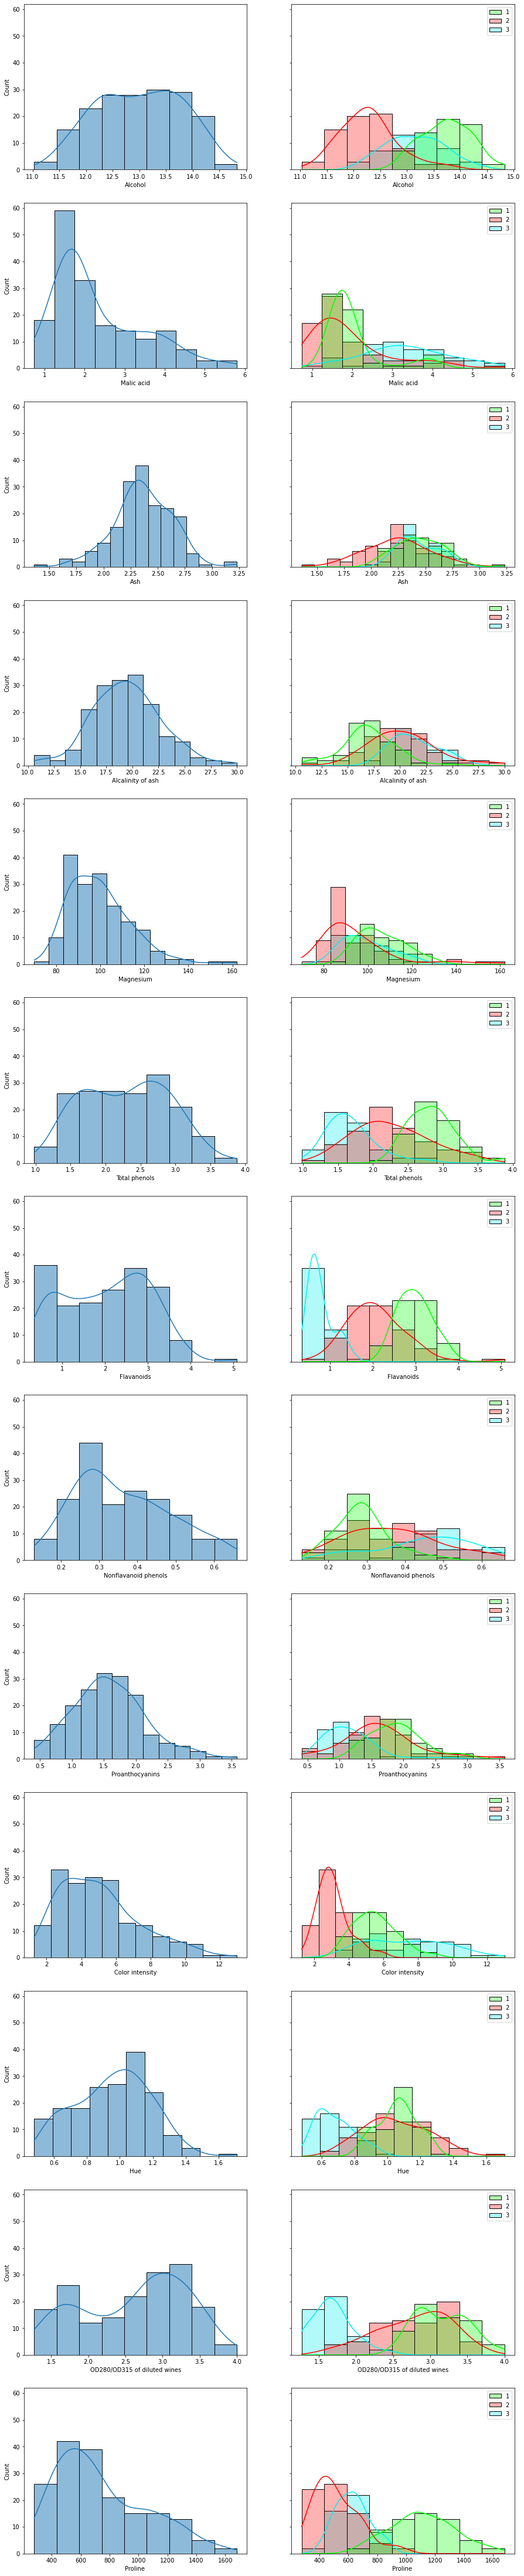

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.reset_orig()

fig, axes = plt.subplots(13, 2, figsize=(15, 80), sharey=True)

count=0
for col in df.columns:
    sns.histplot(df, x=col, ax=axes[count, 0], kde=True)
    sns.histplot(df, x=col, ax=axes[count, 1], hue=y, palette=["#00ff00", "#ff0000", "#00f0f0"], alpha=0.3, kde=True)
    count=count+1

Alcohol, total phenols, Flavanoids and color intensity distribution in each class is pretty different. Nonflavanoids phenols and proanthocyanins distribution is also different for three types although with some big overlaps. Malic acid, Hue and OD280/OD315 of diluted wine distribution is similar for type 1 and 2, but different for type 3. Distribution of Ash and Magnesium in three types is similar. Alcalinity of Ash and Proline is similar for type 2 and 3, but different for type 1.

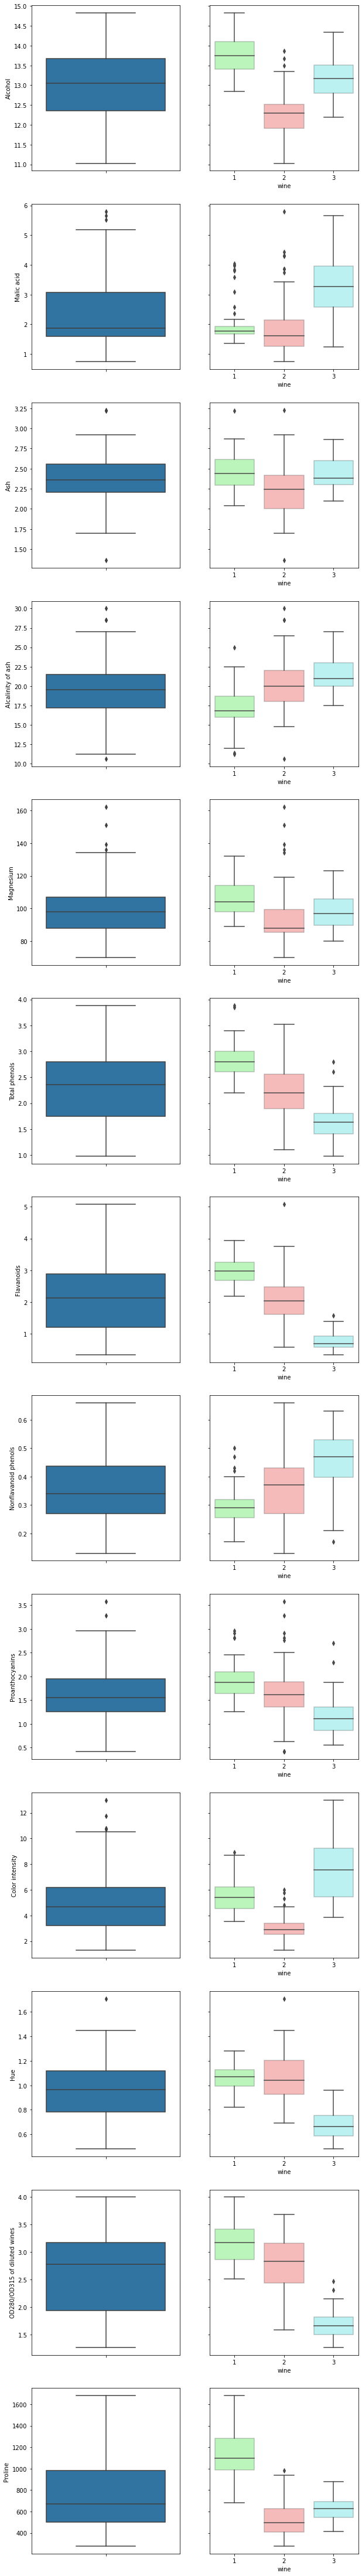

In [16]:
fig, axes = plt.subplots(13, 2, figsize=(10, 80))
count=0
for col in df.columns:
    ax1 = sns.boxplot(y=col, data=df, ax=axes[count, 0])
    ax2 = sns.boxplot(x=wine_df['wine'], y=col, data=df,palette=["#00ff00", "#ff0000", "#00f0f0"], boxprops=dict(alpha=.3), ax=axes[count, 1])
    ax2.set(ylabel=None)
    ax2.set(yticklabels=[])
    count=count+1

There are some outliers that might bring problems in KNN classification, therefore we will use StandardScaler in question 3.

In [17]:
len_init = len(df)
len_init

178

In [18]:
df.dropna()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [19]:
df = df[(df.T != 0).any()]

In [20]:
print ('Number of dropped records: ', len_init - len(df))

Number of dropped records:  0


In [21]:
features_names

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '], dtype=object)

In [22]:
col = 'Hue'
outliers = df[df[col] > df[col].mean() + 3 * df[col].std()]
outliers

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
115,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [23]:
out=pd.DataFrame(columns = features_names)
for col in df.columns:
    outliers = df[df[col]>df[col].mean()+3*df[col].std()]
    out=out+outliers
df1=pd.DataFrame(columns = features_names)
print('Rows with outlier value in at least one of parameters:')
for row in out.index:
    print(row, end = " ")
for row in out.index:   
    df1=df1.append(df.loc[row])
df1

Rows with outlier value in at least one of parameters:
25 69 73 95 110 115 121 123 158 

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0


In [24]:
(df.var()/df.mean()).sort_values(ascending = False)

Proline                         132.772275
Magnesium                         2.045179
Color intensity                   1.062545
Alcalinity of ash                 0.572081
Malic acid                        0.534174
Flavanoids                        0.491664
Proanthocyanins                   0.205918
OD280/OD315 of diluted wines      0.193012
Total phenols                     0.170662
Hue                               0.054567
Alcohol                           0.050695
Nonflavanoid phenols              0.042804
Ash                               0.031804
dtype: float64

In [25]:
corr = df.corr()
corr

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:>

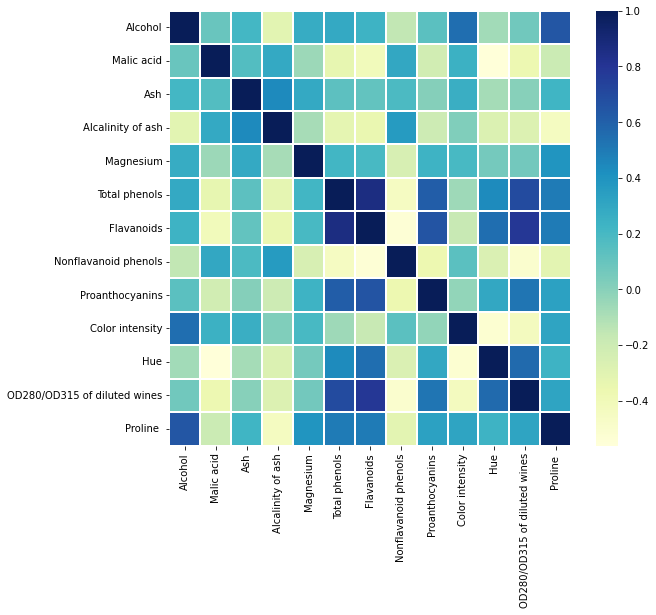

In [26]:
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corr, ax=ax, cmap="YlGnBu", linewidths = 0.1)

There are both positively and negatively correlated attributes. It can be seen that their values are substantial. There are some attributes with pretty high absolute correlation. Top 5 are listed below:

In [27]:
corr.unstack().abs().drop_duplicates().sort_values(ascending=False)[1:6]

Total phenols  Flavanoids                      0.864564
Flavanoids     OD280/OD315 of diluted wines    0.787194
Total phenols  OD280/OD315 of diluted wines    0.699949
Flavanoids     Proanthocyanins                 0.652692
Alcohol        Proline                         0.643720
dtype: float64

In [28]:
corr.replace(1.0, 0.0).unstack().abs().sort_values(ascending = False).drop_duplicates()[:15]

Flavanoids                    Total phenols                   0.864564
                              OD280/OD315 of diluted wines    0.787194
Total phenols                 OD280/OD315 of diluted wines    0.699949
Proanthocyanins               Flavanoids                      0.652692
Proline                       Alcohol                         0.643720
Proanthocyanins               Total phenols                   0.612413
OD280/OD315 of diluted wines  Hue                             0.565468
Hue                           Malic acid                      0.561296
Color intensity               Alcohol                         0.546364
Flavanoids                    Hue                             0.543479
Nonflavanoid phenols          Flavanoids                      0.537900
Color intensity               Hue                             0.521813
Proanthocyanins               OD280/OD315 of diluted wines    0.519067
OD280/OD315 of diluted wines  Nonflavanoid phenols            0.503270
Total 

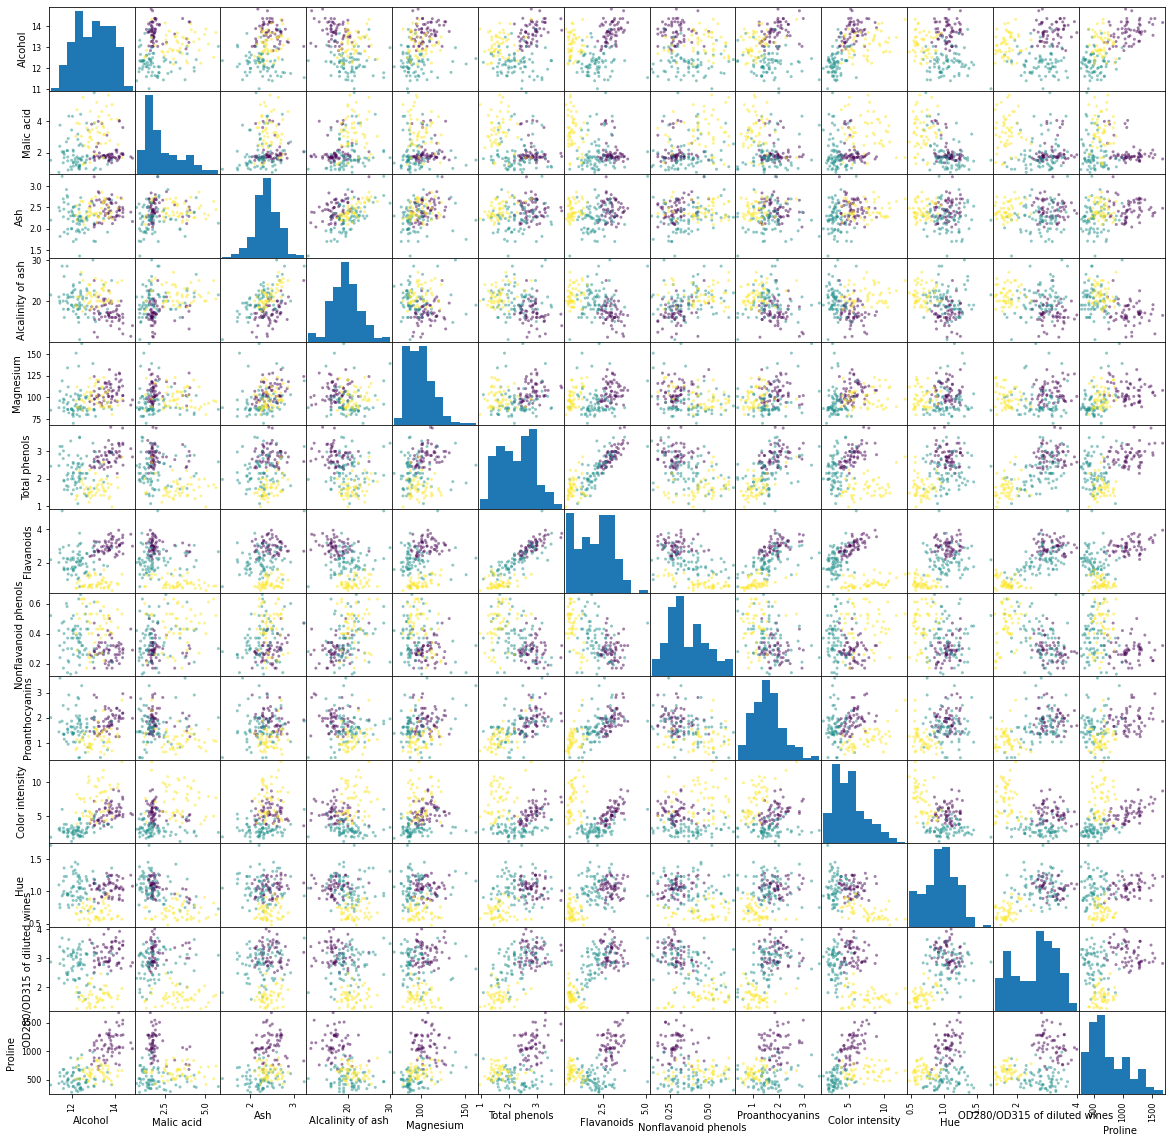

In [29]:
y = y = y.astype('int64')
pd.plotting.scatter_matrix(df.iloc[:, :16], c=y, figsize=(20, 20));

The most correlated pair is Flavanoids and Total phenols.

# Solution 2

Build a DecisionTreeClassifier with arbitrary depth, split the data into training and test sets, and measure the accuracy of the model on both (note: one measurement is no measurement, so make sure you repeat the randomization multiple times). Use alternative metrics that give you a better idea of the model performance. Try different ratios regarding the size of the training and the test sets and see how the accuriacies change. How does this change varies for different depth values? Can you observe the occurrance of under/overfitting? Is that consistent with your theoretical expectations?

In [30]:
# Import the libraries we will be using

import os
import numpy as np
import matplotlib.pylab as plt
import graphviz 
import sklearn
import math

%matplotlib inline

from IPython.display import set_matplotlib_formats
from IPython.display import Image

set_matplotlib_formats('retina')

C:\Users\molda\AppData\Local\Temp/ipykernel_17132/1431203774.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [31]:
#Functions for DecisionTree visualisation

def show_decision_tree(model):
    dot_data = tree.export_graphviz(model, out_file=None) 
    graph = graphviz.Source(dot_data) 
#     To save on a PDF file
#     graph.render("iris")
    return graph

def entropy(target):
    '''
    Formula: entropy = -p1*log(p1) - p2*log(p2) - ...
    '''
    # Get the number of users
    n = len(target)
    # Count how frequently each unique value occurs
    un,counts=np.unique(target,return_counts=True)
    # Initialize entropy
    entropy = 0
    # If the split is perfect, return 0
    if len(counts) <= 1 or 0 in counts:
        return entropy
    # Otherwise, for each possible value, update entropy
    for count in counts:
        entropy += math.log(float(count)/n, len(counts)) * count/n
    # Return entropy
    return -1 * entropy

def information_gain(feature, target, threshold):
    '''
    Formula: IG(parent,children) = entropy(parent) - [p(c1) * entropy(c1) + p(c2) * entropy(c2) + ...]
    '''
    # Dealing with numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Cut the feature vector on the threshold
    feature = (feature < threshold)
    # Initialize information gain with the parent entropy
    ig = entropy(target)
    # For both sides of the threshold, update information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy(target[feature == level])
    # Return information gain
    return ig
def thresholds(X, y):
    t={}
    for threshold in X:
        ig = information_gain(X, y, threshold)
        t[threshold]=ig

    return t
def best_threshold(X, y):
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in X:
        ig = information_gain(X, y, threshold)
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG = %.3f and it occured by splitting on %.4f." % (maximum_ig, maximum_threshold)


In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values
Decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion="gini", random_state=2009)
Decision_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2009)

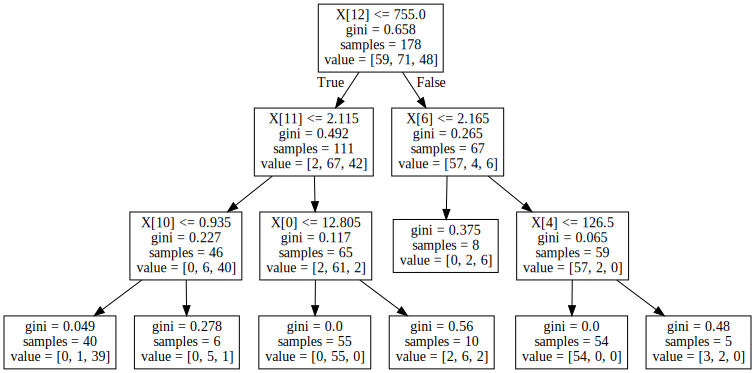

In [33]:
show_decision_tree(Decision_tree)

In [34]:
print('The decision tree with max_depth=3 and min_samples_leaf=5 for the whole dataset used Proline as the first parameter \nwhich is also has the highest relative variance')

The decision tree with max_depth=3 and min_samples_leaf=5 for the whole dataset used Proline as the first parameter 
which is also has the highest relative variance


In [35]:
print("Accuracy = %.3f" % (Decision_tree.score(X, y)))

Accuracy = 0.944


Checking how accuracy changes with different max_depth parameter:

In [36]:
d={}
for a in range(1,10): 
    decision_tree = DecisionTreeClassifier(max_depth=a, criterion="gini")
    decision_tree.fit(X, y)
    d[a]=decision_tree.score(X, y)


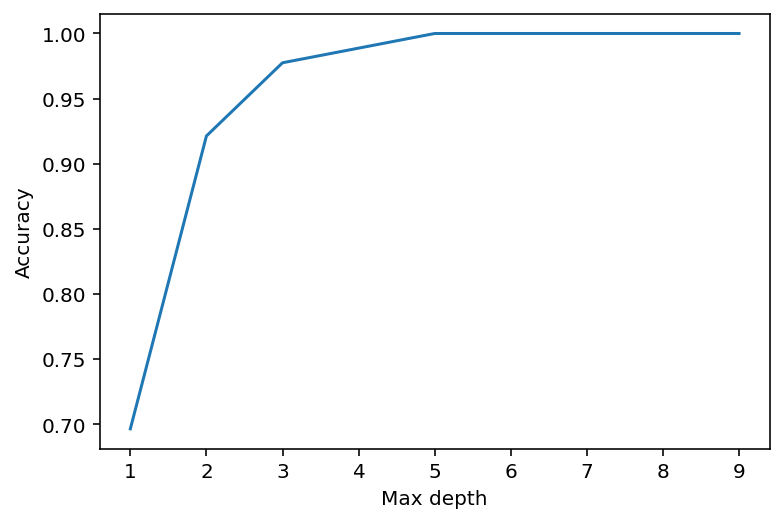

In [37]:
lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show()


In [38]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values

Checking information gains in feature splits of the whole dataset:

For Alcohol : The maximum IG = 0.305 and it occured by splitting on 12.8600.


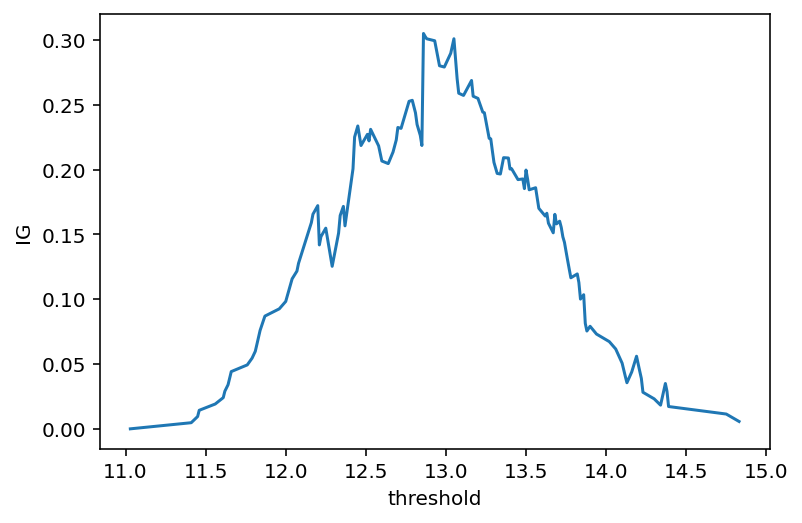

For Malic acid : The maximum IG = 0.184 and it occured by splitting on 2.3100.


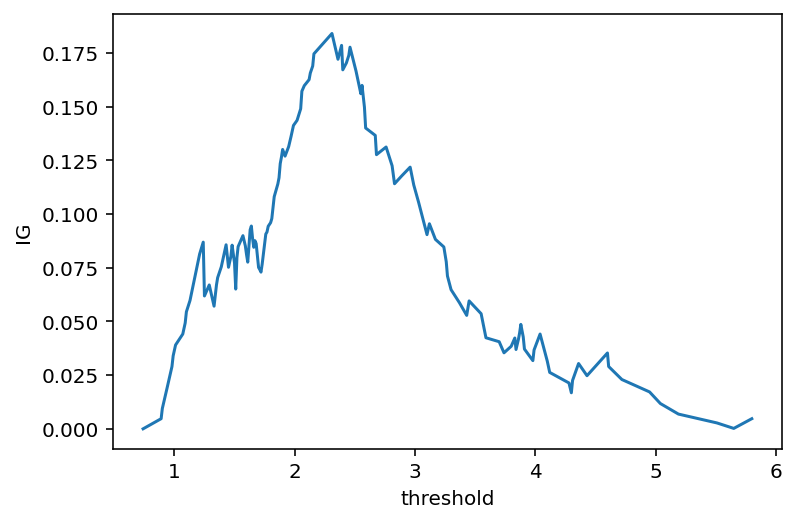

For Ash : The maximum IG = 0.104 and it occured by splitting on 2.0400.


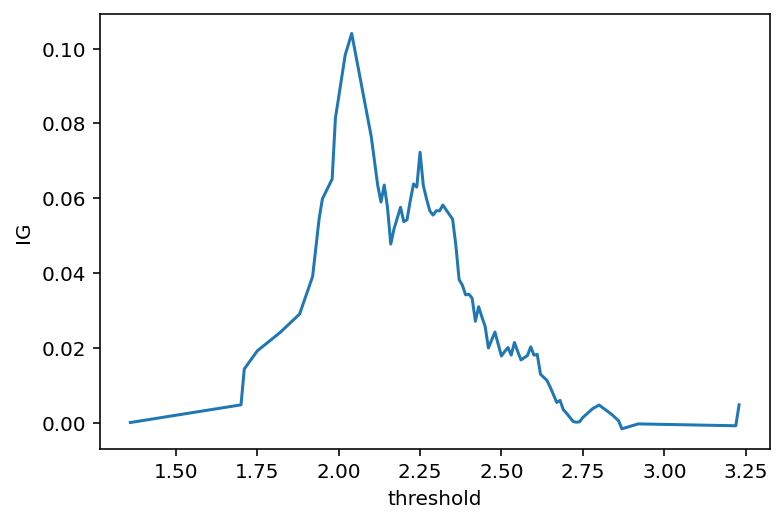

For Alcalinity of ash : The maximum IG = 0.175 and it occured by splitting on 18.0000.


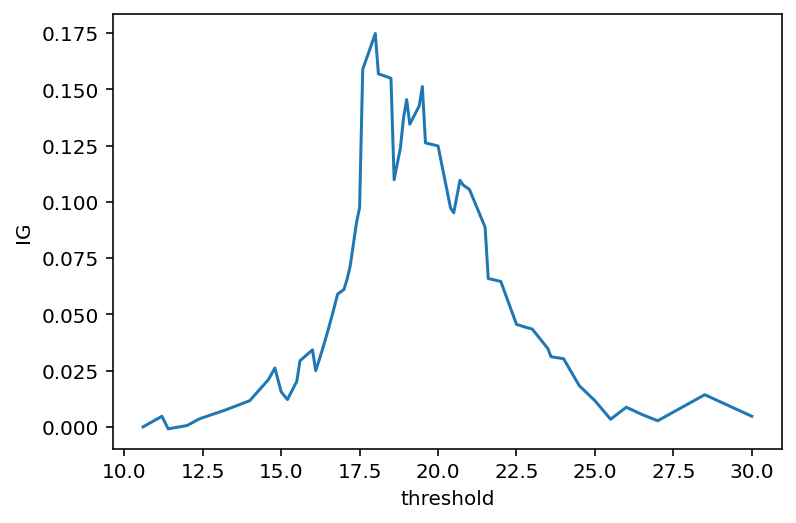

For Magnesium : The maximum IG = 0.136 and it occured by splitting on 90.0000.


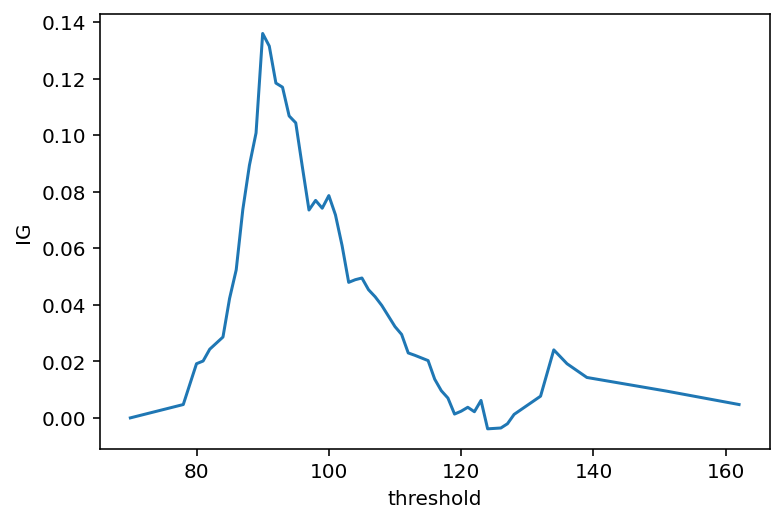

For Total phenols : The maximum IG = 0.315 and it occured by splitting on 2.3500.


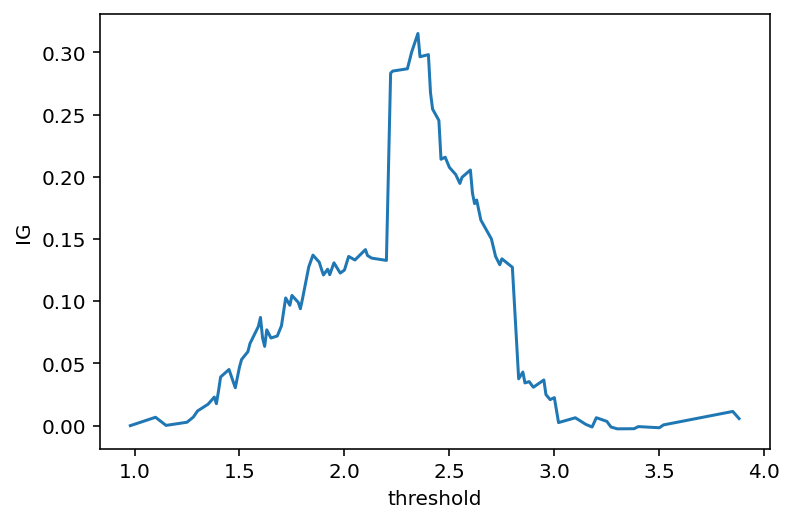

For Flavanoids : The maximum IG = 0.319 and it occured by splitting on 1.4100.


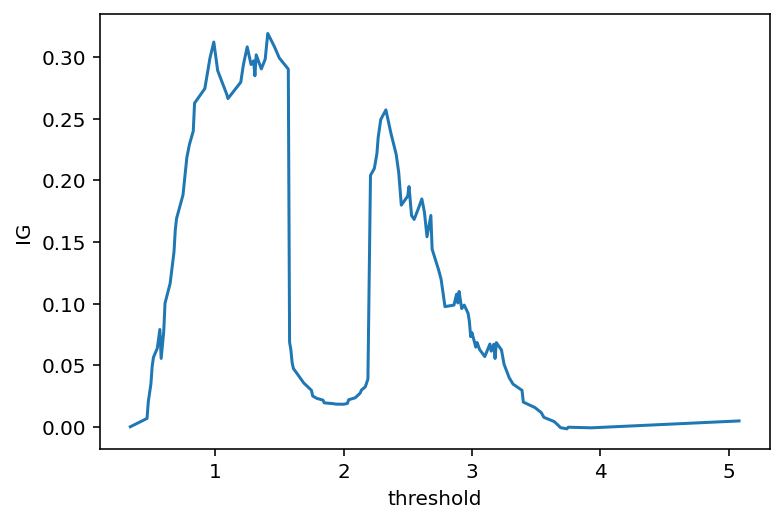

For Nonflavanoid phenols : The maximum IG = 0.139 and it occured by splitting on 0.4000.


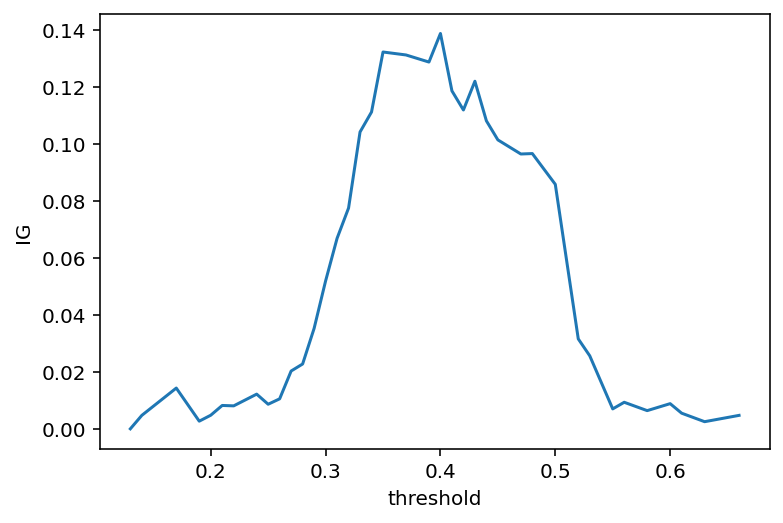

For Proanthocyanins : The maximum IG = 0.167 and it occured by splitting on 1.2800.


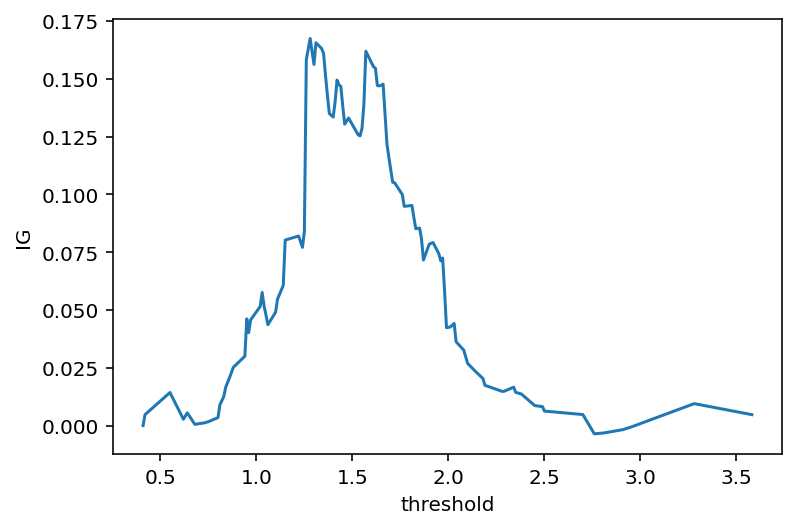

For Color intensity : The maximum IG = 0.369 and it occured by splitting on 3.5200.


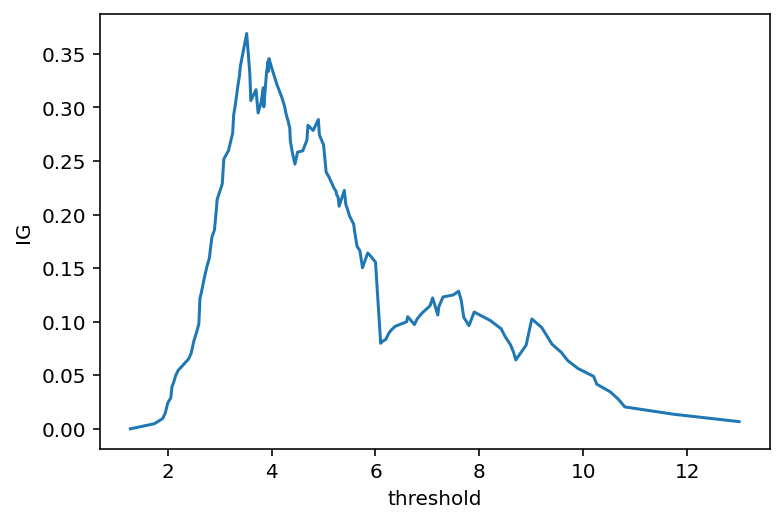

For Hue : The maximum IG = 0.303 and it occured by splitting on 0.8600.


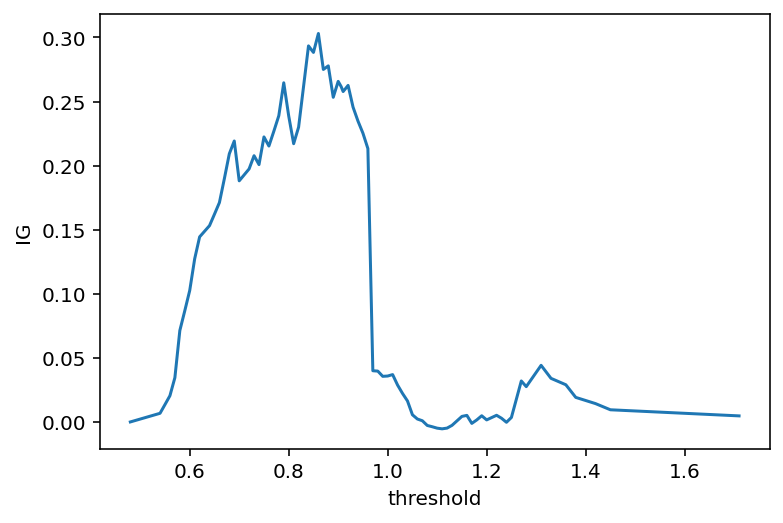

For OD280/OD315 of diluted wines : The maximum IG = 0.314 and it occured by splitting on 2.1200.


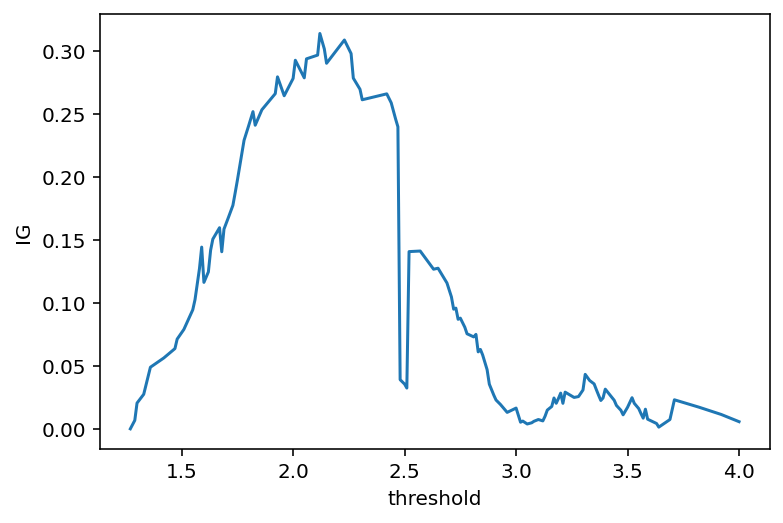

For Proline  : The maximum IG = 0.387 and it occured by splitting on 760.0000.


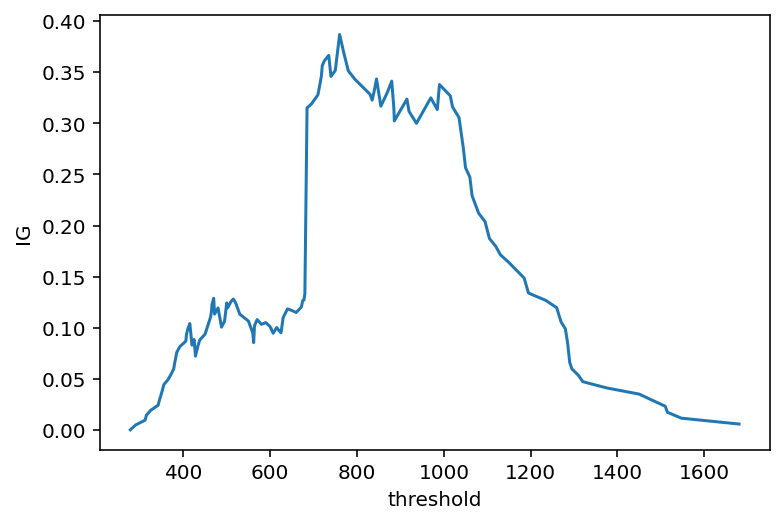

In [39]:
for a in range(0,13): 
    print("For", features_names[a],":", best_threshold(X[:, a], y))
    g=thresholds(X[:, a], y)
    lists = sorted(g.items()) # sorted by key, return a list of tuples
    xx, yy = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(xx, yy)
    plt.xlabel("threshold")
    plt.ylabel("IG")
    plt.show()


In [40]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=2009,
                                                    stratify=y)

In [41]:
unique, counts = np.unique(y, return_counts=True)
y_count = dict(zip(unique, counts))
print(y_count)
unique, counts = np.unique(y_train, return_counts=True)
y_train_count = dict(zip(unique, counts))
print('Training set:',y_train_count)
unique, counts = np.unique(y_test, return_counts=True)
y_test_count = dict(zip(unique, counts))
print('Test set',y_test_count)

{1: 59, 2: 71, 3: 48}
Training set: {1: 47, 2: 57, 3: 38}
Test set {1: 12, 2: 14, 3: 10}


In [42]:
unique, counts = np.unique(y, return_counts=True)
y_count = dict(zip(unique, counts/ float(len(y))*100.0))
print('In percent:',y_count)
unique, counts = np.unique(y_train, return_counts=True)
y_train_count = dict(zip(unique, counts/ float(len(y_train))*100.0))
print('Training set in percent:',y_train_count)
unique, counts = np.unique(y_test, return_counts=True)
y_test_count = dict(zip(unique, counts/ float(len(y_test))*100.0))
print('Test set in percent:',y_test_count)

In percent: {1: 33.146067415730336, 2: 39.8876404494382, 3: 26.96629213483146}
Training set in percent: {1: 33.098591549295776, 2: 40.140845070422536, 3: 26.76056338028169}
Test set in percent: {1: 33.33333333333333, 2: 38.88888888888889, 3: 27.77777777777778}


In [43]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [44]:
y_train.shape, y_test.shape

((142,), (36,))

In [45]:
Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2009)

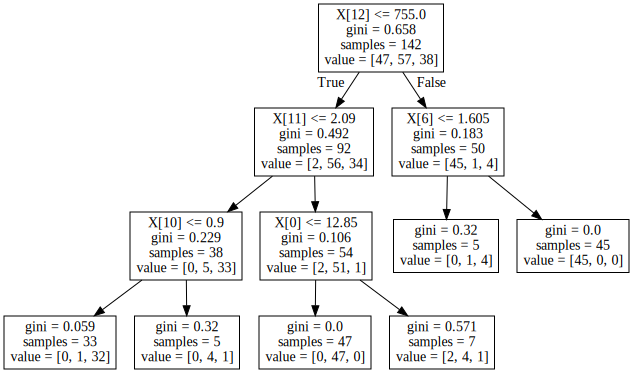

In [46]:
show_decision_tree(Decision_tree)

In [47]:
y_predicted = Decision_tree.predict(X_test)

In [48]:
print("accuracy on the test set", Decision_tree.score(X_test, y_test))
print("accuracy on the training set", Decision_tree.score(X_train, y_train))

accuracy on the test set 0.8333333333333334
accuracy on the training set 0.9577464788732394


In [49]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, y_predicted)

array([[12,  0,  0],
       [ 3, 11,  0],
       [ 0,  3,  7]], dtype=int64)

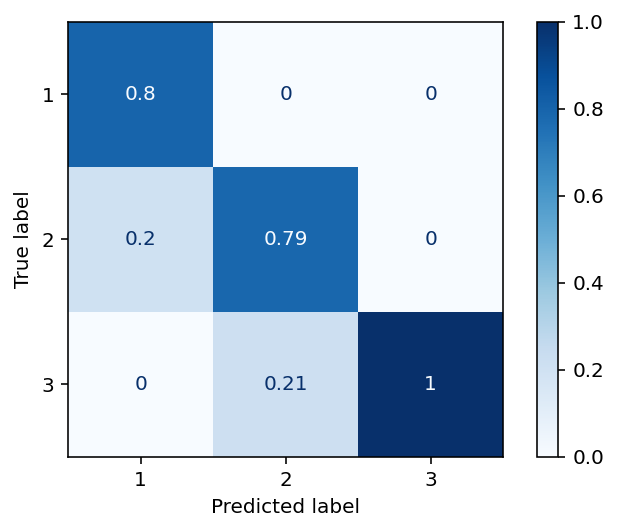

In [50]:
plot_confusion_matrix(Decision_tree, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [51]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.79      0.79      0.79        14
           3       1.00      0.70      0.82        10

    accuracy                           0.83        36
   macro avg       0.86      0.83      0.83        36
weighted avg       0.85      0.83      0.83        36



We have been trying to predict wine type in the test set (20% of total) whether it is type 1, type 2 or type 3 using DecisionTreeClassifier trained on training set (80% of total). Precision for 1 was 0.80 representing the proportion of predicted 1s which were actually correct (12 out of 15 values predicted to be 1 were correctly predicted), which is a fine value. Precision for 2 was slightly worse (0.79) (11 out of 14 values predicted to be 2 were correctly predicted). Precision for 3 was the best (1.00) (7 out of 7 values predicted to be 3 were correctly predicted). <br><br>  Recall for 1 was 1.00, meaning that 100% of actual 1s were correctly classified (there were 12 correct predictions out of 12 actual 1s). Recall for 2 was 0.79, meaning that 79% of actual 2s were correctly classified (there were 11 correct predictions out of 14 actual 2s). Recall for 3 was 0.70, meaning that 70% of actual 3s were correctly classified (there were 7 correct predictions out of 10 actual 3s).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was better for 1s as suggested by f1-score of 0.89, slighly worse for 3s with f1-score of 0.82, and even worse for 2s with f1-score of 0.79.
<br><br>  Support is just a number of actual 0s and 1s in y_test.
<br><br> In the training set wine type could be explained with 95 % accuracy by the decision tree with the features described above with parameters max_depth=3, min_samples_leaf=5, random_state=2009. The performance was similar in test set (83%).
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

Checking other randomizations:

In [52]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values

print('Checking other randomizations:')
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=i,
                                                    stratify=y)
    Decision_tree.fit(X_train, y_train)
    print("random state:", i)
    print("accuracy on the test set", Decision_tree.score(X_test, y_test))
    print("accuracy on the training set", Decision_tree.score(X_train, y_train))
    print("\n")

Checking other randomizations:
random state: 1
accuracy on the test set 0.8888888888888888
accuracy on the training set 0.9295774647887324


random state: 2
accuracy on the test set 0.9166666666666666
accuracy on the training set 0.971830985915493


random state: 3
accuracy on the test set 0.9166666666666666
accuracy on the training set 0.9647887323943662


random state: 4
accuracy on the test set 0.9722222222222222
accuracy on the training set 0.9788732394366197


random state: 5
accuracy on the test set 0.8611111111111112
accuracy on the training set 0.9507042253521126


random state: 6
accuracy on the test set 0.8333333333333334
accuracy on the training set 0.9436619718309859


random state: 7
accuracy on the test set 0.8888888888888888
accuracy on the training set 0.971830985915493


random state: 8
accuracy on the test set 0.9722222222222222
accuracy on the training set 0.9788732394366197


random state: 9
accuracy on the test set 0.9166666666666666
accuracy on the training set 0.

It seems that random state=2009 was not a the best randomization as the model is performing better with other random states that we checked. Let's choose random state 4 and try other training to test dataset ratios:

In [53]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values
from sklearn.model_selection import train_test_split

for i in range(70,99):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=i*0.01,
                                                    test_size=1-i*0.01,
                                                    random_state=4,
                                                    stratify=y)
    Decision_tree.fit(X_train, y_train)
    print("train_size", i*0.01)
    print("train examples", int(y.shape[0]*i*0.01))
    print("accuracy on the test set", Decision_tree.score(X_test, y_test))
    print("accuracy on the training set", Decision_tree.score(X_train, y_train))
    print("\n")

train_size 0.7000000000000001
train examples 124
accuracy on the test set 0.9814814814814815
accuracy on the training set 0.9758064516129032


train_size 0.71
train examples 126
accuracy on the test set 0.8846153846153846
accuracy on the training set 0.9365079365079365


train_size 0.72
train examples 128
accuracy on the test set 0.98
accuracy on the training set 0.9765625


train_size 0.73
train examples 129
accuracy on the test set 0.8775510204081632
accuracy on the training set 0.937984496124031


train_size 0.74
train examples 131
accuracy on the test set 0.8723404255319149
accuracy on the training set 0.9389312977099237


train_size 0.75
train examples 133
accuracy on the test set 0.9777777777777777
accuracy on the training set 0.9774436090225563


train_size 0.76
train examples 135
accuracy on the test set 0.9767441860465116
accuracy on the training set 0.9777777777777777


train_size 0.77
train examples 137
accuracy on the test set 0.975609756097561
accuracy on the training set 

As these are a bit confusing representation, it would be better to show the model performance change using a Learning Curve.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np

tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=4), {'max_depth':range(1, 20)}, cv=10, verbose=1)
tree_grid_search.fit(X_train, y_train)

train_sizes, train_scores, test_scores = learning_curve(
    tree_grid_search.best_estimator_, X, y, cv=10, train_sizes=np.linspace(.1, 1, 10))

Fitting 10 folds for each of 19 candidates, totalling 190 fits


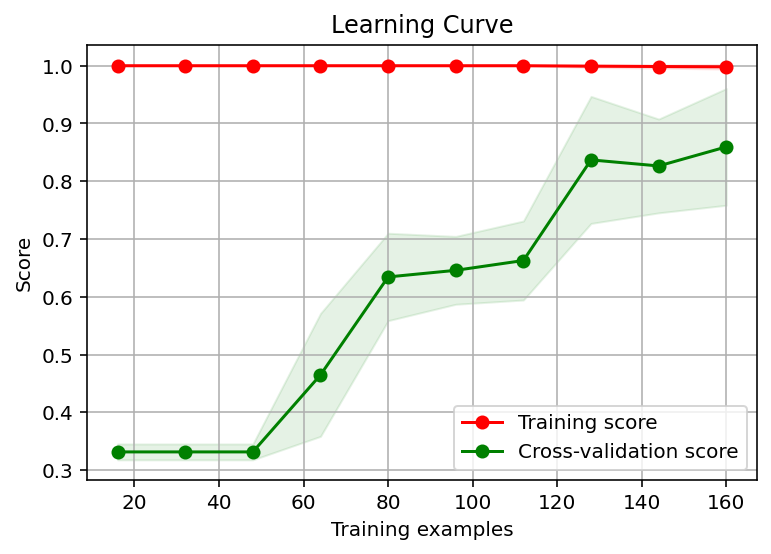

In [55]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

130 is around 75% of 178. Therefore, we will use 75% of total for our training sample (of course stratified).

In [56]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75,
                                                    test_size=0.25,
                                                    random_state=4,
                                                    stratify=y)

In [57]:
unique, counts = np.unique(y, return_counts=True)
y_count = dict(zip(unique, counts))
print(y_count)
unique, counts = np.unique(y_train, return_counts=True)
y_train_count = dict(zip(unique, counts))
print('Training set:',y_train_count)
unique, counts = np.unique(y_test, return_counts=True)
y_test_count = dict(zip(unique, counts))
print('Test set',y_test_count)

{1: 59, 2: 71, 3: 48}
Training set: {1: 44, 2: 53, 3: 36}
Test set {1: 15, 2: 18, 3: 12}


In [58]:
unique, counts = np.unique(y, return_counts=True)
y_count = dict(zip(unique, counts/ float(len(y))*100.0))
print('In percent:',y_count)
unique, counts = np.unique(y_train, return_counts=True)
y_train_count = dict(zip(unique, counts/ float(len(y_train))*100.0))
print('Training set in percent:',y_train_count)
unique, counts = np.unique(y_test, return_counts=True)
y_test_count = dict(zip(unique, counts/ float(len(y_test))*100.0))
print('Test set in percent:',y_test_count)

In percent: {1: 33.146067415730336, 2: 39.8876404494382, 3: 26.96629213483146}
Training set in percent: {1: 33.08270676691729, 2: 39.849624060150376, 3: 27.06766917293233}
Test set in percent: {1: 33.33333333333333, 2: 40.0, 3: 26.666666666666668}


In [59]:
Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2009)

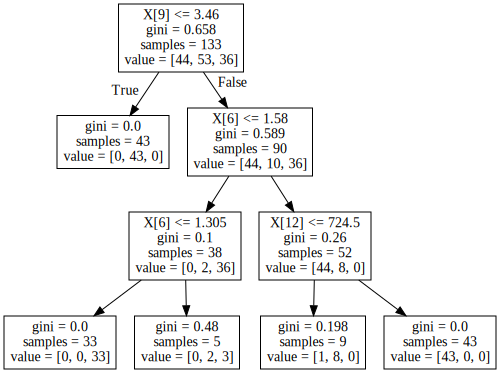

In [60]:
show_decision_tree(Decision_tree)

In [61]:
y_predicted = Decision_tree.predict(X_test)

In [62]:
print("accuracy on the test set", Decision_tree.score(X_test, y_test))
print("accuracy on the training set", Decision_tree.score(X_train, y_train))

accuracy on the test set 0.9777777777777777
accuracy on the training set 0.9774436090225563


In [63]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, y_predicted)

array([[15,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 12]], dtype=int64)

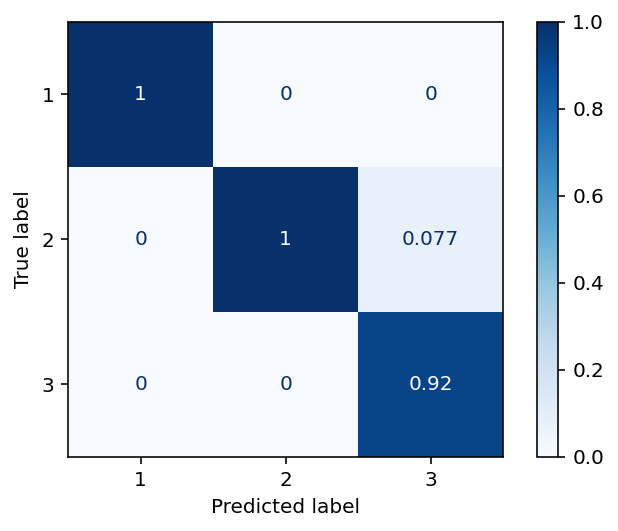

In [64]:
plot_confusion_matrix(Decision_tree, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [65]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Now when we changed the random state and the ratios of training and test datasets to 3/1 the performance of the model is better. Precision for 1 was 1.00 representing the proportion of predicted 1s which were actually correct (15 out of 15 values predicted to be 1 were correctly predicted). Precision for 2 was also 1.00 (17 out of 17 values predicted to be 2 were correctly predicted). Precision for 3 was slightly worse (0.92) (12 out of 13 values predicted to be 3 were correctly predicted). <br><br>  Recall for 1 was 1.00, meaning that 100% of actual 1s were correctly classified (there were 15 correct predictions out of 15 actual 1s). Recall for 2 was 0.94, meaning that 94% of actual 2s were correctly classified (there were 17 correct predictions out of 18 actual 2s). Recall for 3 was 1.00, meaning that 100% of actual 3s were correctly classified (there were 12 correct predictions out of 12 actual 3s).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was better for 1s as suggested by f1-score of 1.00, slighly worse for 2s with f1-score of 0.97, and 0.96 for 3s.
<br><br>  Support is just a number of actual 0s and 1s in y_test.
<br><br> In the training set wine type could be explained with 97 % accuracy by the decision tree with the features described above with parameters max_depth=3, min_samples_leaf=5, random_state=4. The performance was similar in test set (97%).
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

Let's choose the max_depth parameter using the Validation Curve.

In [66]:
from sklearn.model_selection import validation_curve

param_range = range(1,11)

train_scores, test_scores = validation_curve(DecisionTreeClassifier(),X,y,"max_depth",param_range,cv=10)

print("scores on training set\n", train_scores)
print("scores on testing set\n", test_scores)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=max_depth, param_range=range(1, 11) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


scores on training set
 [[0.65625    0.7        0.70625    0.65625    0.65       0.7
  0.66875    0.7        0.68944099 0.68944099]
 [0.925      0.95625    0.94375    0.925      0.93125    0.925
  0.8875     0.91875    0.91925466 0.91304348]
 [0.9875     0.99375    0.98125    1.         0.99375    0.9875
  0.94375    0.98125    0.97515528 0.97515528]
 [1.         1.         0.9875     1.         1.         0.9875
  0.9875     0.99375    0.98757764 0.99378882]
 [1.         1.         1.         1.         1.         1.
  1.         1.         0.98757764 0.99378882]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 

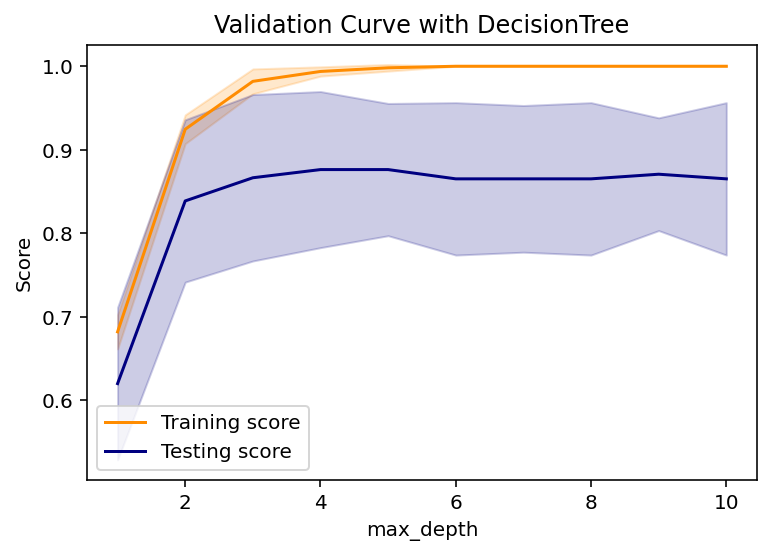

In [67]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_depth")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Testing score", color="navy")

plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.2,
                 color="darkorange")

plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.2,
                 color="navy")

plt.legend()
plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV

tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=4), {'max_depth':range(1, 20)}, cv=10, verbose=1)
tree_grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4),
             param_grid={'max_depth': range(1, 20)}, verbose=1)

In [69]:
tree_grid_search.best_params_

{'max_depth': 3}

In [70]:
tree_grid_search.best_score_

0.9197802197802198

In [71]:
tree_grid_search.best_estimator_.score(X_test, y_test)

0.9777777777777777

In [72]:
from sklearn.model_selection import cross_val_score

# Valid options are for the scorring attribute are 

# ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 
# 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 
# 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 
# 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 
# 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 
# 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 
# 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

scores = cross_val_score(Decision_tree, X, y, cv=10, scoring='accuracy')

print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



scores:  [0.88888889 0.88888889 0.72222222 0.83333333 0.83333333 0.83333333
 0.83333333 0.94444444 0.94117647 1.        ]
Accuracy: 0.87 (+/- 0.15)


In [73]:
print('Samples correctly classified:')
correct_idx = np.where(y_predicted == y_test)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(y_predicted != y_test)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]

Samples incorrectly classified:
[13]


In [74]:
features_names

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '], dtype=object)

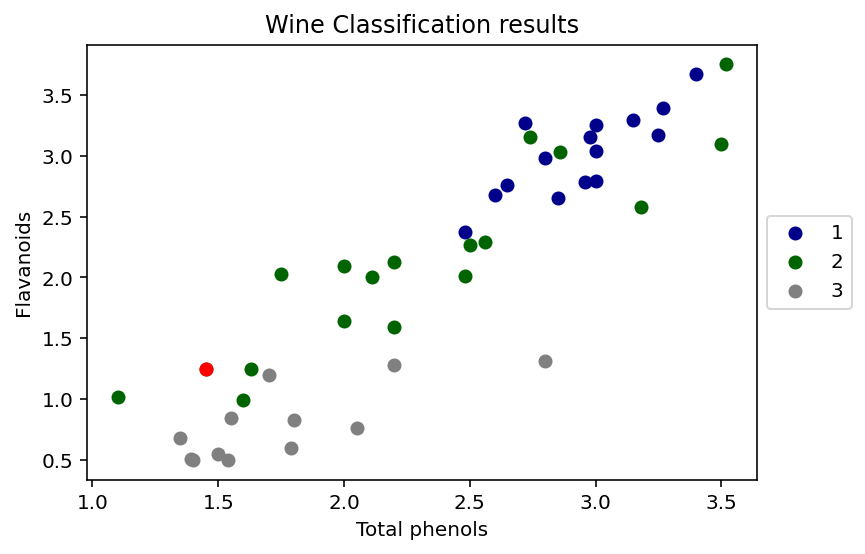

In [75]:
attr_A = 5
attr_B = 6

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n+1)[0]
    plt.scatter(X_test[idx, attr_A], X_test[idx, attr_B], color=color, label=y_values[n])

plt.scatter(X_test[incorrect_idx, attr_A], X_test[incorrect_idx, attr_B], color="red")

plt.xlabel(features_names[attr_A])
plt.ylabel(features_names[attr_B])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Wine Classification results")
plt.show()

In [76]:
incorrect_idx
for i in incorrect_idx:
    print(i,': Prediction:', y_predicted[i])
    print('     True label:', y_test[i])

13 : Prediction: 3
     True label: 2


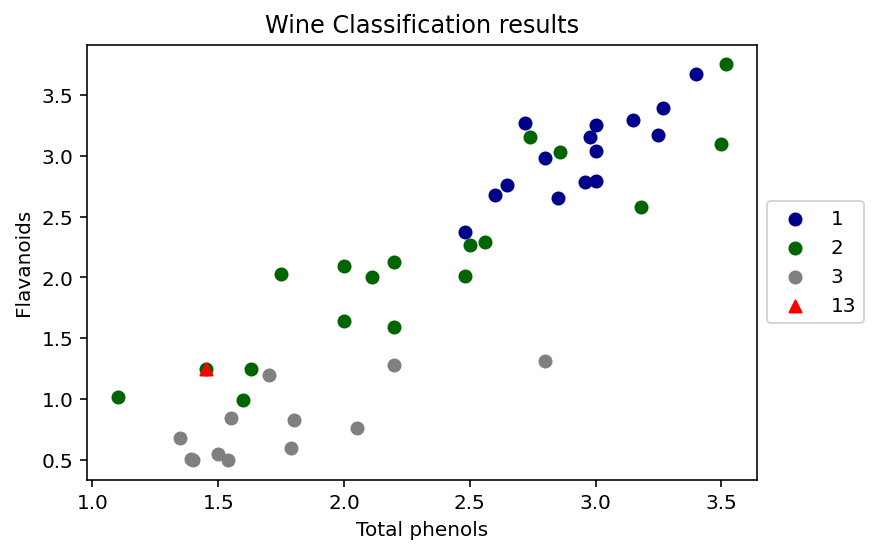

In [77]:
attr_A = 5
attr_B = 6

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n+1)[0]
    plt.scatter(X_test[idx, attr_A], X_test[idx, attr_B], color=color, label=y_values[n])

for a, b in zip(incorrect_idx, ['^']):
    plt.scatter(X_test[a, attr_A], X_test[a, attr_B], color="red", marker=b, label=a)

plt.xlabel(features_names[attr_A])
plt.ylabel(features_names[attr_B])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Wine Classification results")
plt.show()

In [78]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1,30,2), 'min_impurity_decrease':np.arange(0.05,0.4,0.05)}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=4), 
                           param_grid, 
                           cv=10, 
                           verbose=1,
                           return_train_score=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75,
                                                    test_size=0.25,
                                                    random_state=4,
                                                    stratify=y)

grid_search.fit(X_train, y_train)

print("Test set score: {:.4f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))

Fitting 10 folds for each of 105 candidates, totalling 1050 fits
Test set score: 0.9778
Best parameters: {'max_depth': 3, 'min_impurity_decrease': 0.05}
Best cross-validation score: 0.87
Best estimator:
DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.05, random_state=4)
Accuracy on the testing set: 0.9778


In [79]:
final_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], 
                                     min_impurity_decrease=grid_search.best_params_['min_impurity_decrease'])
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.05)

In [80]:
y_predicted = final_model.predict(X_test)

In [81]:
print("accuracy on the test set", final_model.score(X_test, y_test))
print("accuracy on the training set", final_model.score(X_train, y_train))

accuracy on the test set 0.9777777777777777
accuracy on the training set 0.9774436090225563


In [82]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, y_predicted)

array([[15,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 12]], dtype=int64)

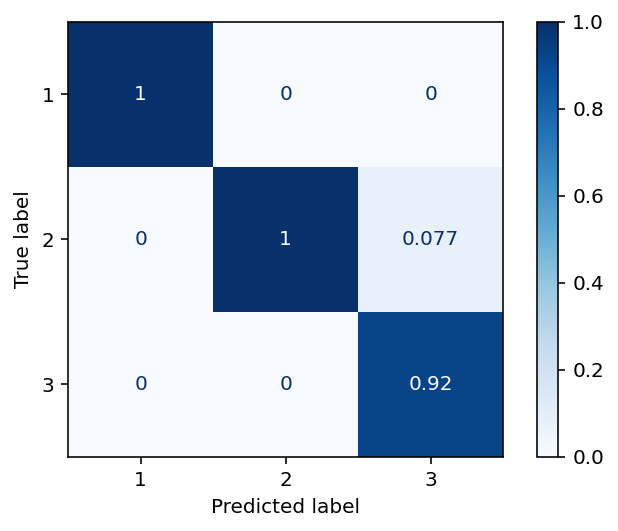

In [83]:
plot_confusion_matrix(final_model, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [84]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The best model performance is the same (we occasionally picked the best max_score), it seems that we already had a good model. Precision for 1 was 1.00 representing the proportion of predicted 1s which were actually correct (15 out of 15 values predicted to be 1 were correctly predicted). Precision for 2 was also 1.00 (17 out of 17 values predicted to be 2 were correctly predicted). Precision for 3 was slightly worse (0.92) (12 out of 13 values predicted to be 3 were correctly predicted). <br><br>  Recall for 1 was 1.00, meaning that 100% of actual 1s were correctly classified (there were 15 correct predictions out of 15 actual 1s). Recall for 2 was 0.94, meaning that 94% of actual 2s were correctly classified (there were 17 correct predictions out of 18 actual 2s). Recall for 3 was 1.00, meaning that 100% of actual 3s were correctly classified (there were 12 correct predictions out of 12 actual 3s).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was better for 1s as suggested by f1-score of 1.00, slighly worse for 2s with f1-score of 0.97, and 0.96 for 3s.
<br><br>  Support is just a number of actual 0s and 1s in y_test.
<br><br> In the training set wine type could be explained with 97 % accuracy. The performance was similar in test set (97%).
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

# Solution 3

Solve the wine classification problem with 3-NN and evaluate it with 5-fold cross-validation.

In [85]:
# Add your code
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report
import numpy as np

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np

wine_df = pd.read_csv("wine.csv")
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values

#With KNN we should also scale the features to make algorithm less sensitive to outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

knn_grid_search = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(1, 30)}, cv=5, verbose=1)
knn_grid_search.fit(X_train, y_train)


train_sizes, train_scores, test_scores = learning_curve(
    knn_grid_search.best_estimator_, X, y, cv=5, train_sizes=np.linspace(.1, 1, 10))

Fitting 5 folds for each of 29 candidates, totalling 145 fits


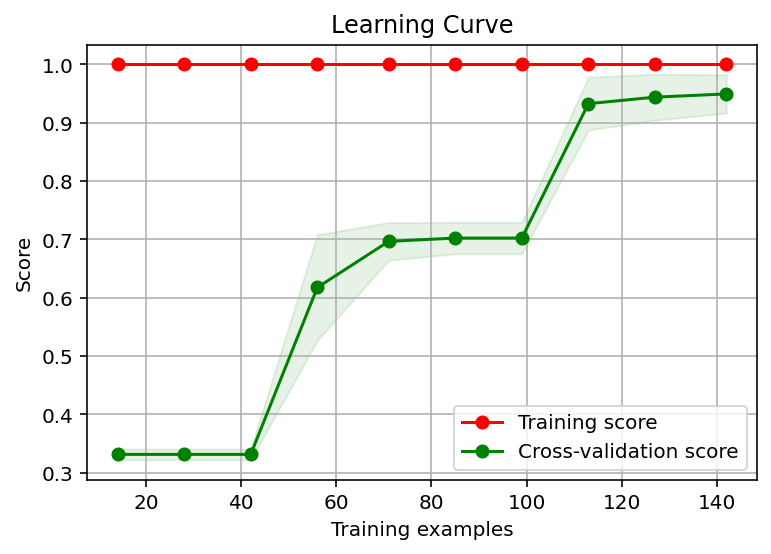

In [87]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Learning Curve suggests that the train dataset with 63% of original data should be enough for the accuracy score of 93%.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.63,
                                                    test_size=0.37,
                                                    random_state=4,
                                                    stratify=y)

In [89]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
knn.score(X_test, y_test)

0.9545454545454546

In [91]:
from sklearn.model_selection import validation_curve

param_range = range(1,31)

train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y, "n_neighbors", param_range, cv=5)

print("scores on training set\n", train_scores)
print("scores on testing set\n", test_scores)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 31) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


scores on training set
 [[1.         1.         1.         1.         1.        ]
 [0.97183099 0.96478873 0.97183099 0.97202797 0.97902098]
 [0.97887324 0.96478873 0.97887324 0.95804196 0.96503497]
 [0.97183099 0.96478873 0.97887324 0.97202797 0.97202797]
 [0.96478873 0.97887324 0.97183099 0.97902098 0.97902098]
 [0.97183099 0.97887324 0.97183099 0.96503497 0.97202797]
 [0.97887324 0.97183099 0.97887324 0.97202797 0.97202797]
 [0.97183099 0.97183099 0.97887324 0.96503497 0.95804196]
 [0.97887324 0.97183099 0.97183099 0.97202797 0.97902098]
 [0.97887324 0.97887324 0.96478873 0.97902098 0.97202797]
 [0.97183099 0.97183099 0.97183099 0.97202797 0.97902098]
 [0.97183099 0.96478873 0.96478873 0.97202797 0.97902098]
 [0.97887324 0.97183099 0.96478873 0.96503497 0.97202797]
 [0.97887324 0.97183099 0.97183099 0.95104895 0.96503497]
 [0.97887324 0.97183099 0.97887324 0.95804196 0.97202797]
 [0.97887324 0.97183099 0.98591549 0.95804196 0.96503497]
 [0.97887324 0.97887324 0.97183099 0.96503497 0.

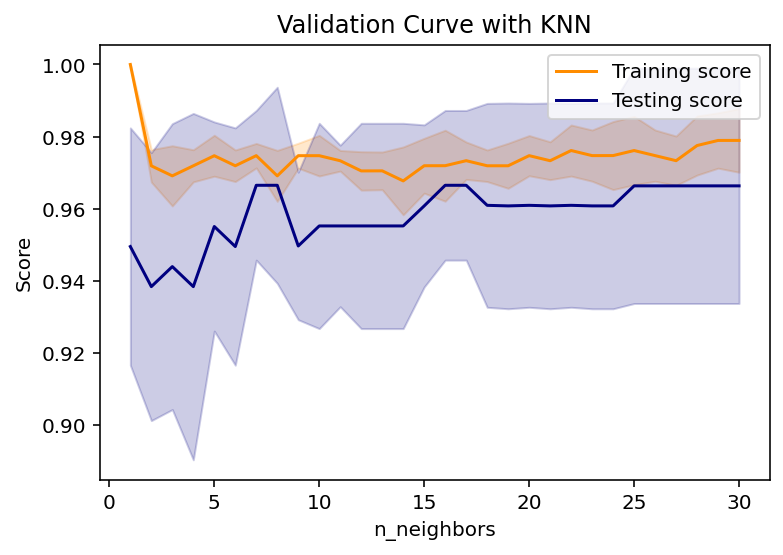

In [92]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Testing score", color="navy")

plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.2,
                 color="darkorange")

plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.2,
                 color="navy")

plt.legend()
plt.show()

In [93]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

In [94]:
print("accuracy on the test set", knn.score(X_test, y_test))
print("accuracy on the training set", knn.score(X_train, y_train))

accuracy on the test set 0.9545454545454546
accuracy on the training set 0.9642857142857143


In [95]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
scores2 = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')

print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("scores_train: ", scores1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))
print("scores_test: ", scores2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))


scores:  [0.88888889 0.94444444 0.97222222 1.         0.91428571]
Accuracy: 0.94 (+/- 0.08)
scores_train:  [0.95652174 0.95652174 1.         0.95454545 0.90909091]
Accuracy: 0.96 (+/- 0.06)
scores_test:  [0.85714286 0.92307692 0.84615385 0.76923077 0.92307692]
Accuracy: 0.86 (+/- 0.11)


In [96]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, y_predicted)

array([[22,  0,  0],
       [ 2, 23,  1],
       [ 0,  0, 18]], dtype=int64)

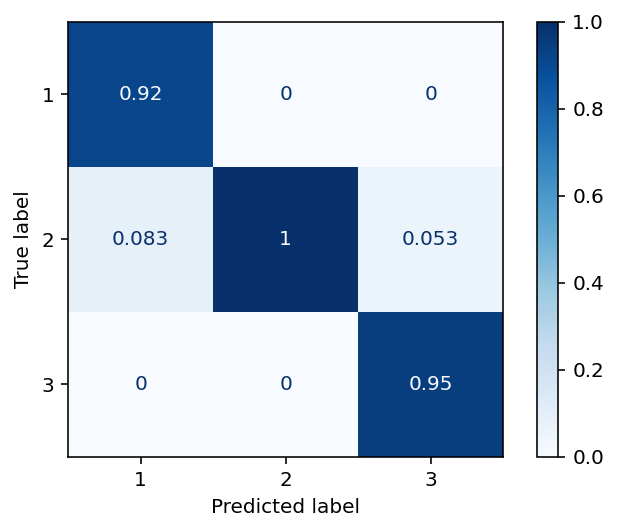

In [97]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [98]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        22
           2       1.00      0.88      0.94        26
           3       0.95      1.00      0.97        18

    accuracy                           0.95        66
   macro avg       0.95      0.96      0.96        66
weighted avg       0.96      0.95      0.95        66



We have been trying to predict wine type whether it is type 1, type 2 or type 3 using 3-NN, but now the data was also normalized to make KNN method applicable. Compared with the DecisionTreeClassifier, the KNN model needed much lower training sample (63% of the total, while DecisionTree needed 75%). The model performance (n_neighbors=3) is a little bit worse than with DecisionTreeClassifier with it's best parameter. Precision for 1 was 0.92 representing the proportion of predicted 1s which were actually correct (22 out of 24 values predicted to be 1 were correctly predicted). Precision for 2 was 1.00 (23 out of 23 values predicted to be 2 were correctly predicted). Precision for 3 was 0.95 (18 out of 19 values predicted to be 3 were correctly predicted). <br><br>  Recall for 1 was 1.00, meaning that 100% of actual 1s were correctly classified (there were 22 correct predictions out of 22 actual 1s). Recall for 2 was 0.88, meaning that 88% of actual 2s were correctly classified (there were 23 correct predictions out of 26 actual 2s). Recall for 3 was 1.00, i.e. 100% of actual 3s were correctly classified (there were 18 correct predictions out of 18 actual 3s).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was better for 3s as suggested by f1-score of 0.97, slightly worse for 1s with f1-score of 0.96, and slighlty worse for 3s with f1-score of 0.94.
<br><br>  Support is just a number of actual 0s and 1s in y_test.
<br><br> In the training set wine type could be explained with 96 % accuracy by the KNN with the features described above with parameter n_neighbors=3. The performance was worse in test set (95%).
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

In [99]:
print('Samples correctly classified:')
correct_idx = np.where(y_predicted == y_test)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(y_predicted != y_test)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 49
 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65]

Samples incorrectly classified:
[ 3 44 52]


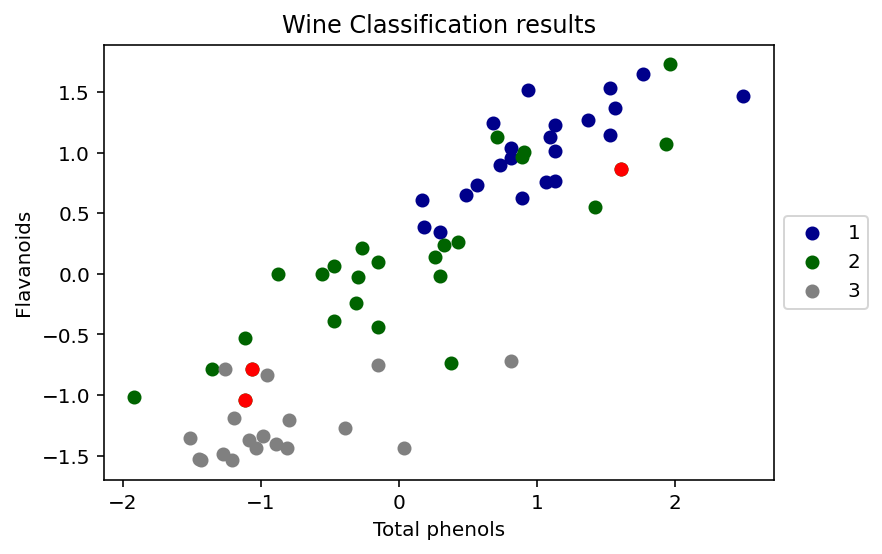

In [100]:
attr_A = 5
attr_B = 6

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n+1)[0]
    plt.scatter(X_test[idx, attr_A], X_test[idx, attr_B], color=color, label=y_values[n])

plt.scatter(X_test[incorrect_idx, attr_A], X_test[incorrect_idx, attr_B], color="red")

plt.xlabel(features_names[attr_A])
plt.ylabel(features_names[attr_B])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Wine Classification results")
plt.show()

In [101]:
incorrect_idx
for i in incorrect_idx:
    print(i,': Prediction:', y_predicted[i])
    print('     True label:', y_test[i])

3 : Prediction: 3
     True label: 2
44 : Prediction: 1
     True label: 2
52 : Prediction: 1
     True label: 2


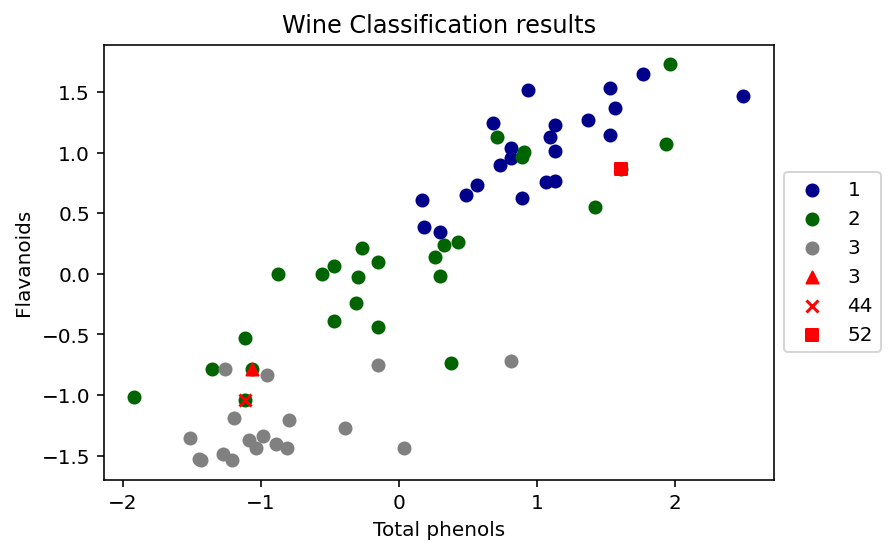

In [102]:
attr_A = 5
attr_B = 6

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n+1)[0]
    plt.scatter(X_test[idx, attr_A], X_test[idx, attr_B], color=color, label=y_values[n])

for a, b in zip(incorrect_idx, ['^','x','s']):
    plt.scatter(X_test[a, attr_A], X_test[a, attr_B], color="red", marker=b, label=a)

plt.xlabel(features_names[attr_A])
plt.ylabel(features_names[attr_B])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Wine Classification results")
plt.show()

I am showing the pair of variables with the highest correlation so that it was more visible. The performance here was fine: there were only 3 mistakes made by 3-nn classifier. First, it could be attributed to the randomization, which due to the small sample size occasionally not being very good. Second, the Validation Curve suggests that the n_neighbors=3 is not the best parameter.

# Solution 4

Output the accuracy of a k-NN classifier with the best value of the hyperparameter k. Comment your solution and the performance beyond accuracy.

In [103]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values
#scaling
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.63,
                                                    test_size=0.37,
                                                    random_state=4,
                                                    stratify=y)


knn_grid_search = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(1, 30)}, cv=5, verbose=1)
knn_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, verbose=1)

In [104]:
knn_grid_search.best_params_

{'n_neighbors': 19}

In [105]:
knn_grid_search.best_score_

0.9913043478260869

In [106]:
knn_grid_search.best_estimator_.score(X_test, y_test)

0.9696969696969697

the best value of the hyperparameter k=19. The validation curve suggests that the score will improve only slightly, so although k=3 is not the best parameter in this randomization, the best score will be only 96.96%, which is not very good improvement.

In [107]:
final_model = KNeighborsClassifier(n_neighbors=knn_grid_search.best_params_['n_neighbors'])
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [108]:
y_predicted = final_model.predict(X_test)

In [109]:
print("accuracy on the test set", final_model.score(X_test, y_test))

accuracy on the test set 0.9696969696969697


In [110]:
confusion_matrix(y_test, y_predicted)


array([[22,  0,  0],
       [ 2, 24,  0],
       [ 0,  0, 18]], dtype=int64)

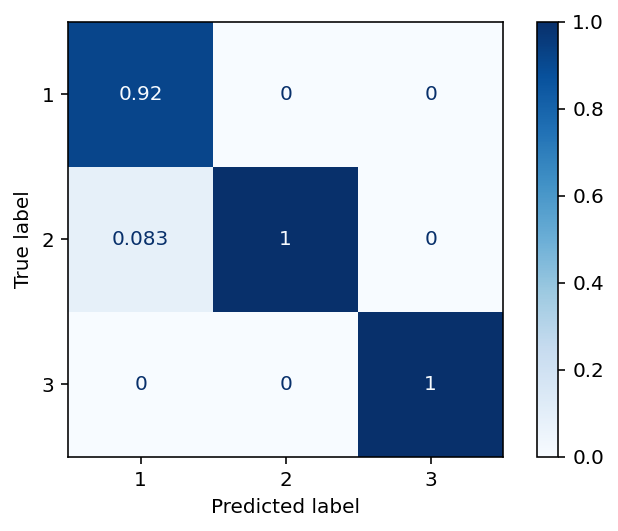

In [111]:
plot_confusion_matrix(final_model, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [112]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        22
           2       1.00      0.92      0.96        26
           3       1.00      1.00      1.00        18

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



The model performance when we try to predict wine type using 19-NN (2 mistakes) is slightly better than in 3-NN (3 mistakes), but still slightly worse than DecisionTreeClassifier (1 mistake). Precision for 1 was 0.92 (same as 3-NN) representing the proportion of predicted 1s which were actually correct (22 out of 24 values predicted to be 1 were correctly predicted). Precision for 2 was 1.00 (same as 3-NN) (24 out of 24 values predicted to be 2 were correctly predicted). Precision for 3 was 1.00 (slightly better than 3-NN) (18 out of 18 values predicted to be 3 were correctly predicted). <br><br>  Recall for 1 was 1.00 (same as 3-NN), meaning that 100% of actual 1s were correctly classified (there were 22 correct predictions out of 22 actual 1s). Recall for 2 was 0.92 (slightly better than 3-NN), meaning that 92% of actual 2s were correctly classified (there were 24 correct predictions out of 26 actual 2s). Recall for 3 was 1.00 (same as 3-NN)(there were 18 correct predictions out of 18 actual 3s).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was better for 3s as suggested by f1-score of 1.00 and slightly worse for 1s and 2s with f1-score of 0.96 (still very good).
<br><br>  Support is just a number of actual 0s and 1s in y_test.
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

# Solution 5

Which model would you pick (DecisionTree or k-NN) to solve the problem in a business context?

If there was no limitation I would try several model, including DecisionTree and k-NN, but usually we are constrained with time and computor memory (which also affects time). In the business context it therefore depends on the sample size and time needed to present the results. KNN is costlier if the dataset is big, in this case we were lucky to have a relatively smaller dataset, so that we could check different values for the number of nearest neighbors parameter and could come with the best one. Moreover, we had to apply StandardScaler for our features in KNN, which is could also remove important feature differences therefore causing accuracy to go down (in our case we actually increased accuracy, as I first did KNN without normalization and received accuracy of around 75%, so had to redo with normalized by scaler data). The DecisionTreeClassifier in our case showed the best performance, although it can be sometimes subject to poor randomization (as it was in our first try) and the max_depth parameter tuning also needed some computation, so we should again try several times. Nevertheless, we did not have to alter the distribution of data. Moreover, decision tree handles features with more care as it decides in terms of information gain of the specific split of feature. The decision trees are also easy to interpret and visualize, which is also good when presenting in front of a boss (In KNN it might be more abstract presentation with more features). Thereforem I would pick the DecisionTree model.